In [ ]:
###################
# Pre-requisites
###################
from google.colab import drive
import json
import copy
import html
import pandas as pd
import os

###################
# Drive Mount
###################
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns

In [ ]:
###################
# Main Analysis Function
###################
def print_analysis(path):
  with open(path) as f:
    data = json.load(f)

  rows = []

  # Transforms the json metrics into a list of dictionaries (named flat)
  for i, result in enumerate(data):
    metrics = result['metrics']
    flat = {"id": i}
    for group, values in metrics.items():
        for metric, score in values.items():
            flat[f"{group}.{metric}"] = score
    rows.append(flat) # appends the dictionary into the list


  # Conversion into Pandas DataFrame
  df = pd.DataFrame(rows)
  df["bertscore.f1"] = df["bertscore.f1"].apply(
      lambda x: x[0] if isinstance(x, list) else x
  )

  # Calculates Mean and STD from the metrics, quickly with Pandas
  # stats = df[['bertscore.f1', 'rouge.rougeL', 'bleu.score', 'llm_judge.relevance', 'llm_judge.factual_correctness', 'llm_judge.helpfulness', 'llm_judge.conciseness']].agg(["mean", "std"])
  stats = df[['bertscore.f1', 'rouge.rougeL', 'bleu.score', 'llm_judge.argument_correctness']].agg(["mean", "std"])
  # stats = df[['bertscore.f1', 'rouge.rougeL', 'bleu.score']].agg(["mean", "std"])

  # Printing of Data
  print(path)
  print(len(data))
  print(stats)


In [ ]:
import json
import pandas as pd

data_dir = "./drive/MyDrive/hyperscale/new_judged_results_helpful/"
# data_dir = "./drive/MyDrive/hyperscale/final_results/"

rows = []
files = os.listdir(data_dir)
for path in files:
    with open(data_dir+path) as f:
        data = json.load(f)
    # Flatten
    for i, result in enumerate(data):
      metrics = result['metrics']
      flat = {"id": i}
      for group, values in metrics.items():
          for metric, score in values.items():
              flat[f"{group}.{metric}"] = score
      flat["model"] = path.split(".")[0]
      rows.append(flat) # appends the dictionary into the list
      # metrics["model"] = path.split(".")[0]
      # rows.append(metrics)

df = pd.DataFrame(rows)
df["bertscore.f1"] = df["bertscore.f1"].apply(
      lambda x: x[0] if isinstance(x, list) else x
  )


In [ ]:
summary = df[['model','bertscore.f1', 'rouge.rougeL', 'bleu.score', 'llm_judge.argument_correctness', 'llm_judge.task_completion', 'llm_judge.helpfulness']].groupby('model').agg(['mean', 'std'])
summary


bertscore.f1           rouge.rougeL            \
                                mean       std         mean       std   
model                                                                   
llama_base_eng_results      0.845636  0.014112     0.159184  0.026258   
llama_base_kor_results      0.721531  0.028163     0.060758  0.035180   
llama_eng_results           0.869063  0.013283     0.224067  0.028232   
llama_kor_results           0.869767  0.012545     0.221485  0.032117   
openai_base_eng_results     0.837774  0.020312     0.129930  0.034082   
openai_base_kor_results     0.806388  0.058501     0.106150  0.054791   
openai_eng_results          0.869499  0.014053     0.219338  0.031158   
openai_kor_results          0.868947  0.013913     0.220140  0.030881   
qwen_base_eng_results       0.836338  0.012226     0.160939  0.025803   
qwen_base_kor_results       0.823539  0.032305     0.149493  0.041850   
qwen_eng_results            0.868177  0.011523     0.223257  0.032485   
qwen_kor_results            0.866733  0.014673     0.222115  0.030266   

                        bleu.score           llm_judge.argument_correctness  \
                              mean       std                           mean   
model                                                                         
llama_base_eng_results    4.138920  2.605900                           2.59   
llama_base_kor_results    1.198046  1.164897                           2.09   
llama_eng_results        12.802543  3.698612                           2.07   
llama_kor_results        12.487799  3.584731                           2.03   
openai_base_eng_results   1.502008  1.797278                           2.86   
openai_base_kor_results   1.583139  2.030152                           3.02   
openai_eng_results       13.063053  3.877657                           2.51   
openai_kor_results       12.287834  3.488365                           2.38   
qwen_base_eng_results     4.814866  2.332556                           2.12   
qwen_base_kor_results     4.301796  2.212063                           2.08   
qwen_eng_results         12.587802  3.630177                           2.00   
qwen_kor_results         12.340982  3.464112                           1.98   

                                  llm_judge.task_completion            \
                              std                      mean       std   
model                                                                   
llama_base_eng_results   1.231694                      2.40  0.816497   
llama_base_kor_results   0.922174                      1.95  0.575159   
llama_eng_results        0.700000                      2.68  0.851380   
llama_kor_results        0.593823                      2.39  0.665074   
openai_base_eng_results  1.119343                      2.87  1.116045   
openai_base_kor_results  1.189007                      2.82  1.258346   
openai_eng_results       1.010001                      3.63  1.125059   
openai_kor_results       0.850193                      3.65  1.067187   
qwen_base_eng_results    0.844232                      2.48  0.758521   
qwen_base_kor_results    0.706106                      2.12  0.498077   
qwen_eng_results         0.550482                      2.68  0.776940   
qwen_kor_results         0.619221                      2.36  0.627968   

                        llm_judge.helpfulness            
                                         mean       std  
model                                                    
llama_base_eng_results                   2.60  0.651339  
llama_base_kor_results                   1.92  0.544578  
llama_eng_results                        3.13  0.836720  
llama_kor_results                        2.60  0.696311  
openai_base_eng_results                  2.97  0.915136  
openai_base_kor_results                  2.83  1.044998  
openai_eng_results                       3.82  0.978352  
openai_kor_results                       3.73  1.033333  
qwen_bas

In [ ]:
summary = summary.reset_index()

# Graphs

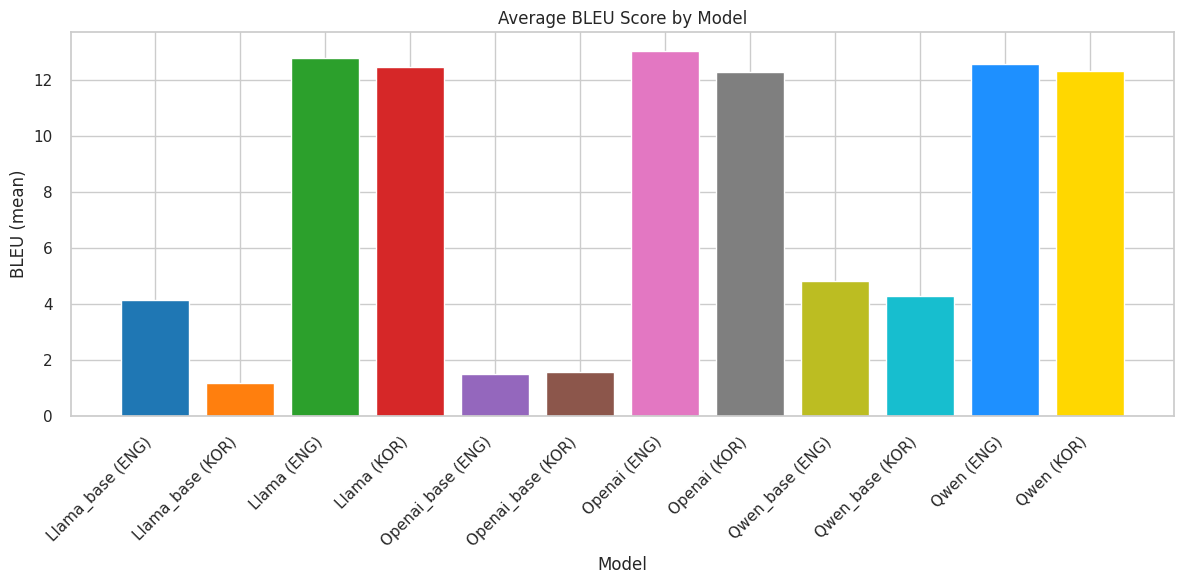

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the dataset manually
data = {
    "model": [
        "Llama_base (ENG)", "Llama_base (KOR)", "Llama (ENG)", "Llama (KOR)",
        "Openai_base (ENG)", "Openai_base (KOR)", "Openai (ENG)", "Openai (KOR)",
        "Qwen_base (ENG)", "Qwen_base (KOR)", "Qwen (ENG)", "Qwen (KOR)"
    ],
    "bleu_mean": [
        4.138920, 1.198046, 12.802543, 12.487799,
        1.502008, 1.583139, 13.063053, 12.287834,
        4.814866, 4.301796, 12.587802, 12.340982
    ]
}

df = pd.DataFrame(data)

# Different colors for each bar
colors = [
    "tab:blue", "tab:orange", "tab:green", "tab:red",
    "tab:purple", "tab:brown", "tab:pink", "tab:gray",
    "tab:olive", "tab:cyan", "dodgerblue", "gold"
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df["model"], df["bleu_mean"], color=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Average BLEU Score by Model")
plt.xlabel("Model")
plt.ylabel("BLEU (mean)")
plt.tight_layout()
plt.show()


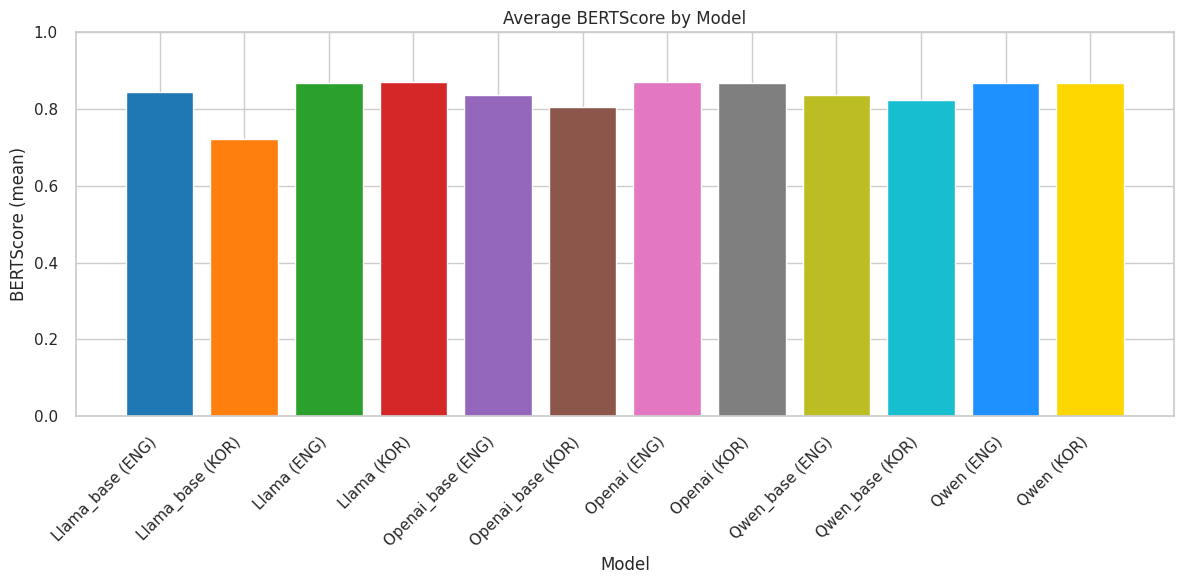

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the dataset manually for BERTScore means
data = {
    "model": [
        "Llama_base (ENG)", "Llama_base (KOR)", "Llama (ENG)", "Llama (KOR)",
        "Openai_base (ENG)", "Openai_base (KOR)", "Openai (ENG)", "Openai (KOR)",
        "Qwen_base (ENG)", "Qwen_base (KOR)", "Qwen (ENG)", "Qwen (KOR)"
    ],
    "bertscore_mean": [
        0.845636, 0.721531, 0.869063, 0.869767,
        0.837774, 0.806388, 0.869499, 0.868947,
        0.836338, 0.823539, 0.868177, 0.866733
    ]
}

df = pd.DataFrame(data)

# Different colors for each bar
colors = [
    "tab:blue", "tab:orange", "tab:green", "tab:red",
    "tab:purple", "tab:brown", "tab:pink", "tab:gray",
    "tab:olive", "tab:cyan", "dodgerblue", "gold"
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df["model"], df["bertscore_mean"], color=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Average BERTScore by Model")
plt.xlabel("Model")
plt.ylabel("BERTScore (mean)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

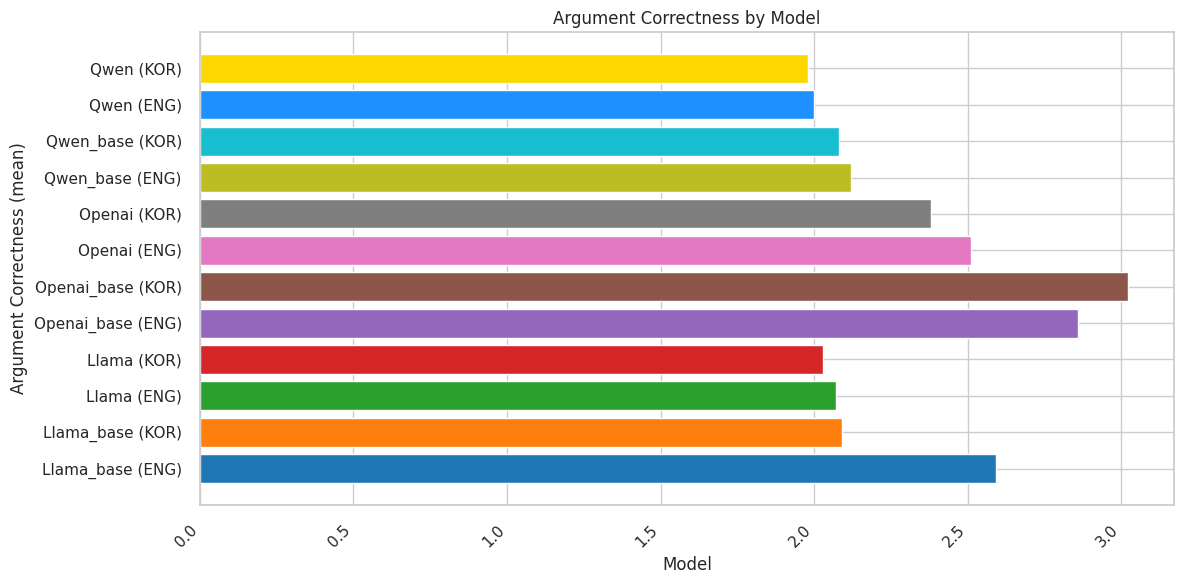

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Argument Correctness means from your table
data = {
    "model": [
        "Llama_base (ENG)", "Llama_base (KOR)", "Llama (ENG)", "Llama (KOR)",
        "Openai_base (ENG)", "Openai_base (KOR)", "Openai (ENG)", "Openai (KOR)",
        "Qwen_base (ENG)", "Qwen_base (KOR)", "Qwen (ENG)", "Qwen (KOR)"
    ],
    "argument_correctness_mean": [
        2.59, 2.09, 2.07, 2.03,
        2.86, 3.02, 2.51, 2.38,
        2.12, 2.08, 2.00, 1.98
    ]
}

df = pd.DataFrame(data)

colors = [
    "tab:blue", "tab:orange", "tab:green", "tab:red",
    "tab:purple", "tab:brown", "tab:pink", "tab:gray",
    "tab:olive", "tab:cyan", "dodgerblue", "gold"
]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(df["model"], df["argument_correctness_mean"], color=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Argument Correctness by Model")
plt.xlabel("Model")
plt.ylabel("Argument Correctness (mean)")
plt.tight_layout()
plt.show()


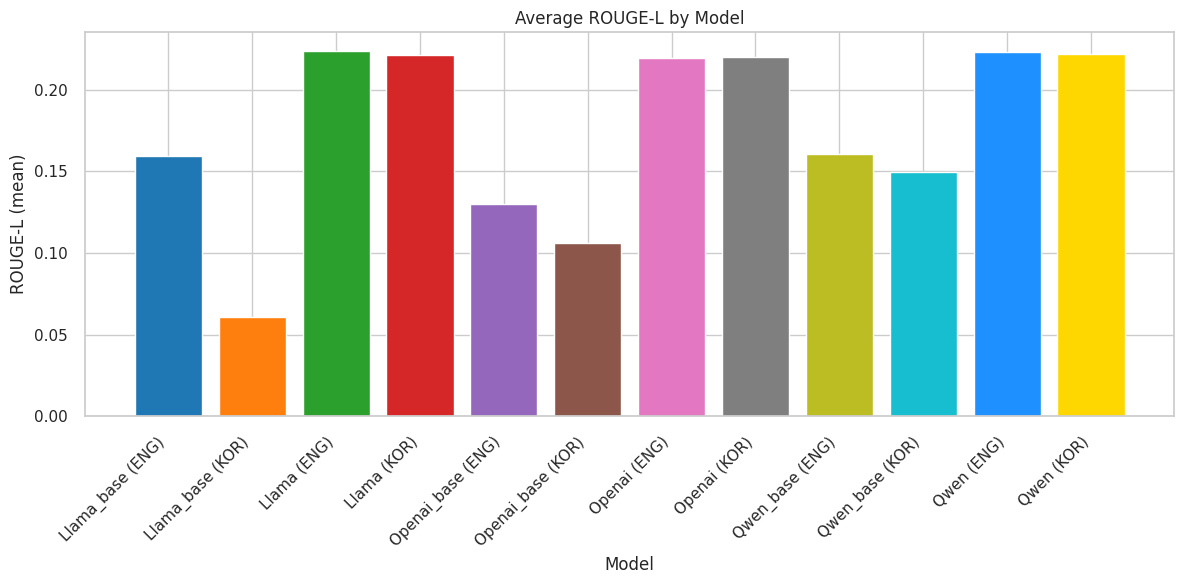

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ROUGE-L means from your table
data = {
    "model": [
        "Llama_base (ENG)", "Llama_base (KOR)", "Llama (ENG)", "Llama (KOR)",
        "Openai_base (ENG)", "Openai_base (KOR)", "Openai (ENG)", "Openai (KOR)",
        "Qwen_base (ENG)", "Qwen_base (KOR)", "Qwen (ENG)", "Qwen (KOR)"
    ],
    "rougeL_mean": [
        0.159184, 0.060758, 0.224067, 0.221485,
        0.129930, 0.106150, 0.219338, 0.220140,
        0.160939, 0.149493, 0.223257, 0.222115
    ]
}

df = pd.DataFrame(data)

colors = [
    "tab:blue", "tab:orange", "tab:green", "tab:red",
    "tab:purple", "tab:brown", "tab:pink", "tab:gray",
    "tab:olive", "tab:cyan", "dodgerblue", "gold"
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df["model"], df["rougeL_mean"], color=colors)
plt.xticks(rotation=45, ha="right")
plt.title("Average ROUGE-L by Model")
plt.xlabel("Model")
plt.ylabel("ROUGE-L (mean)")
plt.tight_layout()
plt.show()


# Further Code

In [ ]:
means = means.reset_index()

In [ ]:
means['model_family'] = means.apply(
    lambda r: r['model'].split("_")[0].capitalize(),
    axis = 1
)
df['model_family'] = df.apply(
    lambda r: r['model'].split("_")[0].capitalize(),
    axis = 1
)
means

,index,model,bertscore.f1,rouge.rougeL,bleu.score,llm_judge.argument_correctness,model_family,eval_set,fine_tuned,out_name
0,0,llama_base_eng_results,0.845636,0.159184,4.138920,2.59,Llama,eng,base,Llama_base (ENG)
1,1,llama_base_kor_results,0.721531,0.060758,1.198046,2.09,Llama,kor,base,Llama_base (KOR)
2,2,llama_eng_results,0.869063,0.224067,12.802543,2.07,Llama,eng,eng,Llama_ENG
3,3,llama_kor_results,0.869767,0.221485,12.487799,2.03,Llama,kor,kor,Llama_KOR
4,4,openai_base_eng_results,0.837774,0.129930,1.502008,2.86,Openai,eng,base,Openai_base (ENG)
5,5,openai_base_kor_results,0.806388,0.106150,1.583139,3.02,Openai,kor,base,Openai_base (KOR)
6,6,openai_eng_results,0.869499,0.219338,13.063053,2.51,Openai,eng,eng,Openai_ENG
7,7,openai_kor_results,0.868947,0.220140,12.287834,2.38,Openai,kor,kor,Openai_KOR
8,8,qwen_base_eng_results,0.836338,0.160939,4.814866,2.12,Qwen,eng,base,Qwen_base (ENG)
9,9,qwen_base_kor_results,0.823539,0.149493,4.301796,2.08,Qwen,kor,base,Qwen_base (KOR)


In [ ]:
means['eval_set'] = means.apply(
    lambda r: r['model'].split("_")[-2],
    axis = 1
)
df['eval_set'] = df.apply(
    lambda r: r['model'].split("_")[-2],
    axis = 1
)
means

,index,model,bertscore.f1,rouge.rougeL,bleu.score,llm_judge.argument_correctness,model_family,eval_set,fine_tuned,out_name
0,0,llama_base_eng_results,0.845636,0.159184,4.138920,2.59,Llama,eng,base,Llama_base (ENG)
1,1,llama_base_kor_results,0.721531,0.060758,1.198046,2.09,Llama,kor,base,Llama_base (KOR)
2,2,llama_eng_results,0.869063,0.224067,12.802543,2.07,Llama,eng,eng,Llama_ENG
3,3,llama_kor_results,0.869767,0.221485,12.487799,2.03,Llama,kor,kor,Llama_KOR
4,4,openai_base_eng_results,0.837774,0.129930,1.502008,2.86,Openai,eng,base,Openai_base (ENG)
5,5,openai_base_kor_results,0.806388,0.106150,1.583139,3.02,Openai,kor,base,Openai_base (KOR)
6,6,openai_eng_results,0.869499,0.219338,13.063053,2.51,Openai,eng,eng,Openai_ENG
7,7,openai_kor_results,0.868947,0.220140,12.287834,2.38,Openai,kor,kor,Openai_KOR
8,8,qwen_base_eng_results,0.836338,0.160939,4.814866,2.12,Qwen,eng,base,Qwen_base (ENG)
9,9,qwen_base_kor_results,0.823539,0.149493,4.301796,2.08,Qwen,kor,base,Qwen_base (KOR)


In [ ]:
means['fine_tuned'] = means.apply(
    lambda r: r['model'].split("_")[-2] if r['model'].split("_")[-3] != "base" else "base",
    axis = 1
)
df['fine_tuned'] = df.apply(
    lambda r: r['model'].split("_")[-2] if r['model'].split("_")[-3] != "base" else "base",
    axis = 1
)
means

,index,model,bertscore.f1,rouge.rougeL,bleu.score,llm_judge.argument_correctness,model_family,eval_set,fine_tuned,out_name
0,0,llama_base_eng_results,0.845636,0.159184,4.138920,2.59,Llama,eng,base,Llama_base (ENG)
1,1,llama_base_kor_results,0.721531,0.060758,1.198046,2.09,Llama,kor,base,Llama_base (KOR)
2,2,llama_eng_results,0.869063,0.224067,12.802543,2.07,Llama,eng,eng,Llama_ENG
3,3,llama_kor_results,0.869767,0.221485,12.487799,2.03,Llama,kor,kor,Llama_KOR
4,4,openai_base_eng_results,0.837774,0.129930,1.502008,2.86,Openai,eng,base,Openai_base (ENG)
5,5,openai_base_kor_results,0.806388,0.106150,1.583139,3.02,Openai,kor,base,Openai_base (KOR)
6,6,openai_eng_results,0.869499,0.219338,13.063053,2.51,Openai,eng,eng,Openai_ENG
7,7,openai_kor_results,0.868947,0.220140,12.287834,2.38,Openai,kor,kor,Openai_KOR
8,8,qwen_base_eng_results,0.836338,0.160939,4.814866,2.12,Qwen,eng,base,Qwen_base (ENG)
9,9,qwen_base_kor_results,0.823539,0.149493,4.301796,2.08,Qwen,kor,base,Qwen_base (KOR)


In [ ]:
means['out_name'] = means.apply(
    lambda r: f"{r['model_family']}_{r['fine_tuned']} ({r['eval_set'].upper()})" if r['fine_tuned'] == "base" else f"{r['model_family']}_{r['fine_tuned'].upper()}",
    axis = 1
)
df['out_name'] = df.apply(
    lambda r: f"{r['model_family']}_{r['fine_tuned']} ({r['eval_set'].upper()})" if r['fine_tuned'] == "base" else f"{r['model_family']}_{r['fine_tuned'].upper()}",
    axis = 1
)
means

,index,model,bertscore.f1,rouge.rougeL,bleu.score,llm_judge.argument_correctness,model_family,eval_set,fine_tuned,out_name
0,0,llama_base_eng_results,0.845636,0.159184,4.138920,2.59,Llama,eng,base,Llama_base (ENG)
1,1,llama_base_kor_results,0.721531,0.060758,1.198046,2.09,Llama,kor,base,Llama_base (KOR)
2,2,llama_eng_results,0.869063,0.224067,12.802543,2.07,Llama,eng,eng,Llama_ENG
3,3,llama_kor_results,0.869767,0.221485,12.487799,2.03,Llama,kor,kor,Llama_KOR
4,4,openai_base_eng_results,0.837774,0.129930,1.502008,2.86,Openai,eng,base,Openai_base (ENG)
5,5,openai_base_kor_results,0.806388,0.106150,1.583139,3.02,Openai,kor,base,Openai_base (KOR)
6,6,openai_eng_results,0.869499,0.219338,13.063053,2.51,Openai,eng,eng,Openai_ENG
7,7,openai_kor_results,0.868947,0.220140,12.287834,2.38,Openai,kor,kor,Openai_KOR
8,8,qwen_base_eng_results,0.836338,0.160939,4.814866,2.12,Qwen,eng,base,Qwen_base (ENG)
9,9,qwen_base_kor_results,0.823539,0.149493,4.301796,2.08,Qwen,kor,base,Qwen_base (KOR)


In [ ]:
df

,id,bleu.score,bleu.counts,bleu.totals,bleu.precisions,bleu.bp,bleu.sys_len,bleu.ref_len,rouge.rouge1,rouge.rouge2,...,bertscore.f1,bertscore.hashcode,llm_judge.argument_correctness,llm_judge.task_completion,llm_judge.helpfulness,model,model_family,eval_set,fine_tuned,out_name
0,0,12.980041,"[221, 90, 39, 18]","[371, 370, 369, 368]","[59.56873315363882, 24.324324324324323, 10.569...",0.784595,371,461,0.489209,0.161616,...,0.862651,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,4,4,llama_eng_results,Llama,eng,eng,Llama_ENG
1,1,10.623418,"[240, 94, 36, 11]","[407, 406, 405, 404]","[58.96805896805897, 23.15270935960591, 8.88888...",0.787943,407,504,0.529032,0.181113,...,0.874086,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,3,3,llama_eng_results,Llama,eng,eng,Llama_ENG
2,2,17.247944,"[189, 81, 49, 28]","[394, 393, 392, 391]","[47.96954314720812, 20.610687022900763, 12.5, ...",1.000000,394,372,0.490446,0.201278,...,0.875790,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,2,4,llama_eng_results,Llama,eng,eng,Llama_ENG
3,3,17.146226,"[208, 96, 51, 29]","[327, 326, 325, 324]","[63.608562691131496, 29.447852760736197, 15.69...",0.757079,327,418,0.538462,0.228070,...,0.893552,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,2,3,llama_eng_results,Llama,eng,eng,Llama_ENG
4,4,9.247004,"[152, 49, 21, 9]","[374, 373, 372, 371]","[40.64171122994652, 13.136729222520108, 5.6451...",1.000000,374,334,0.424448,0.098807,...,0.849133,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,2,3,llama_eng_results,Llama,eng,eng,Llama_ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,95,8.423407,"[192, 72, 25, 6]","[452, 451, 450, 449]","[42.47787610619469, 15.964523281596453, 5.5555...",1.000000,452,372,0.474719,0.149296,...,0.870726,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,3,2,llama_kor_results,Llama,kor,kor,Llama_KOR
1196,96,8.191957,"[198, 56, 19, 9]","[398, 397, 396, 395]","[49.74874371859296, 14.105793450881611, 4.7979...",0.875320,398,451,0.369844,0.074180,...,0.854687,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,2,2,2,llama_kor_results,Llama,kor,kor,Llama_KOR
1197,97,13.203118,"[236, 97, 43, 15]","[471, 470, 469, 468]","[50.10615711252654, 20.638297872340427, 9.1684...",1.000000,471,416,0.561549,0.205270,...,0.875444,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,3,3,3,llama_kor_results,Llama,kor,kor,Llama_KOR
1198,98,5.155058,"[169, 56, 17, 7]","[296, 295, 294, 293]","[57.0945945945946, 18.983050847457626, 5.78231...",0.466026,296,522,0.449040,0.100741,...,0.855964,roberta-large_L17_no-idf_version=0.3.12(hug_tr...,1,2,3,llama_kor_results,Llama,kor,kor,Llama_KOR


In [ ]:
df = df.sort_values(by='out_name')

In [ ]:
df_copy = df[['model','bertscore.f1', 'rouge.rougeL', 'bleu.score', 'llm_judge.argument_correctness', 'llm_judge.task_completion', 'llm_judge.helpfulness', 'model_family', 'eval_set', 'fine_tuned', 'out_name']]
df_copy

,model,bertscore.f1,rouge.rougeL,bleu.score,llm_judge.argument_correctness,llm_judge.task_completion,llm_judge.helpfulness,model_family,eval_set,fine_tuned,out_name
0,llama_eng_results,0.862651,0.253237,12.980041,2,4,4,Llama,eng,eng,Llama_ENG
1,llama_eng_results,0.874086,0.227097,10.623418,2,3,3,Llama,eng,eng,Llama_ENG
2,llama_eng_results,0.875790,0.261146,17.247944,2,2,4,Llama,eng,eng,Llama_ENG
3,llama_eng_results,0.893552,0.272727,17.146226,2,2,3,Llama,eng,eng,Llama_ENG
4,llama_eng_results,0.849133,0.213922,9.247004,2,2,3,Llama,eng,eng,Llama_ENG
...,...,...,...,...,...,...,...,...,...,...,...
1195,llama_kor_results,0.870726,0.221910,8.423407,2,3,2,Llama,kor,kor,Llama_KOR
1196,llama_kor_results,0.854687,0.227596,8.191957,2,2,2,Llama,kor,kor,Llama_KOR
1197,llama_kor_results,0.875444,0.204703,13.203118,3,3,3,Llama,kor,kor,Llama_KOR
1198,llama_kor_results,0.855964,0.186115,5.155058,1,2,3,Llama,kor,kor,Llama_KOR


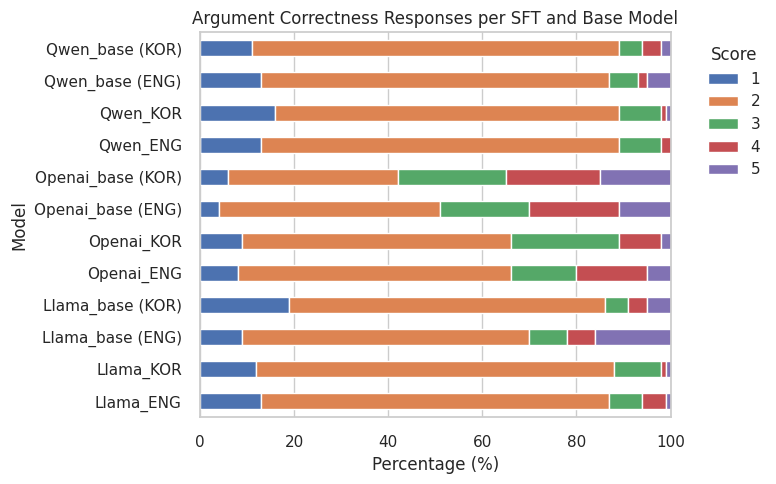

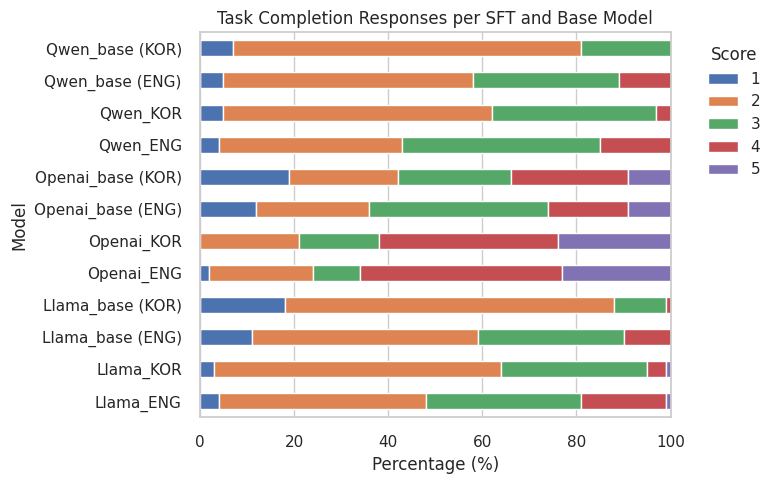

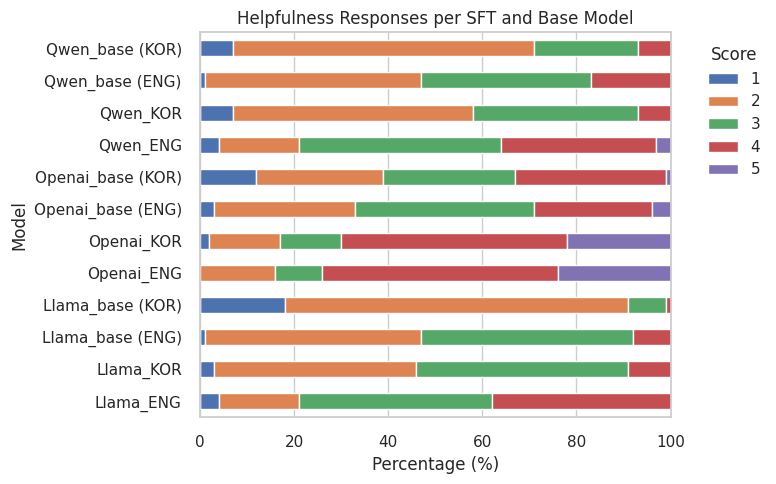

In [ ]:
llm_metrics = [
    "llm_judge.argument_correctness",
    "llm_judge.task_completion",
    "llm_judge.helpfulness"
]
group_col = "out_name"
score_levels = [1, 2, 3, 4, 5]
for metric in llm_metrics:
    # Count score occurrences
    stacked_data = (
        df.groupby([group_col, metric])
          .size()
          .unstack(fill_value=0)
          .reindex(columns=score_levels, fill_value=0)
    )

    # Convert counts → percentages (row-wise)
    stacked_pct = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

    # Plot horizontal percent stacked bars
    stacked_pct.plot(
        kind="barh",
        stacked=True,
        figsize=(8, 5)
    )

    plt.title(f"{metric.split(".")[1].replace("_", " ").title()} Responses per SFT and Base Model")
    plt.xlabel("Percentage (%)")
    plt.ylabel("Model")
    plt.xlim(0, 100)
    plt.legend(title="Score", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

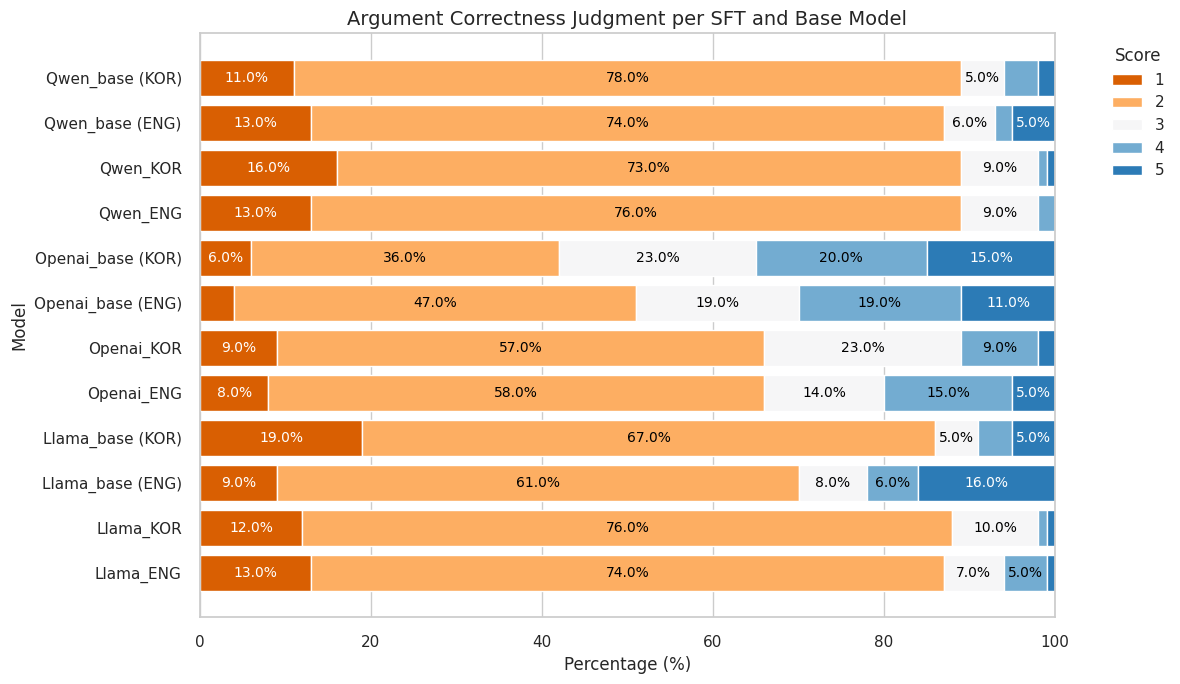

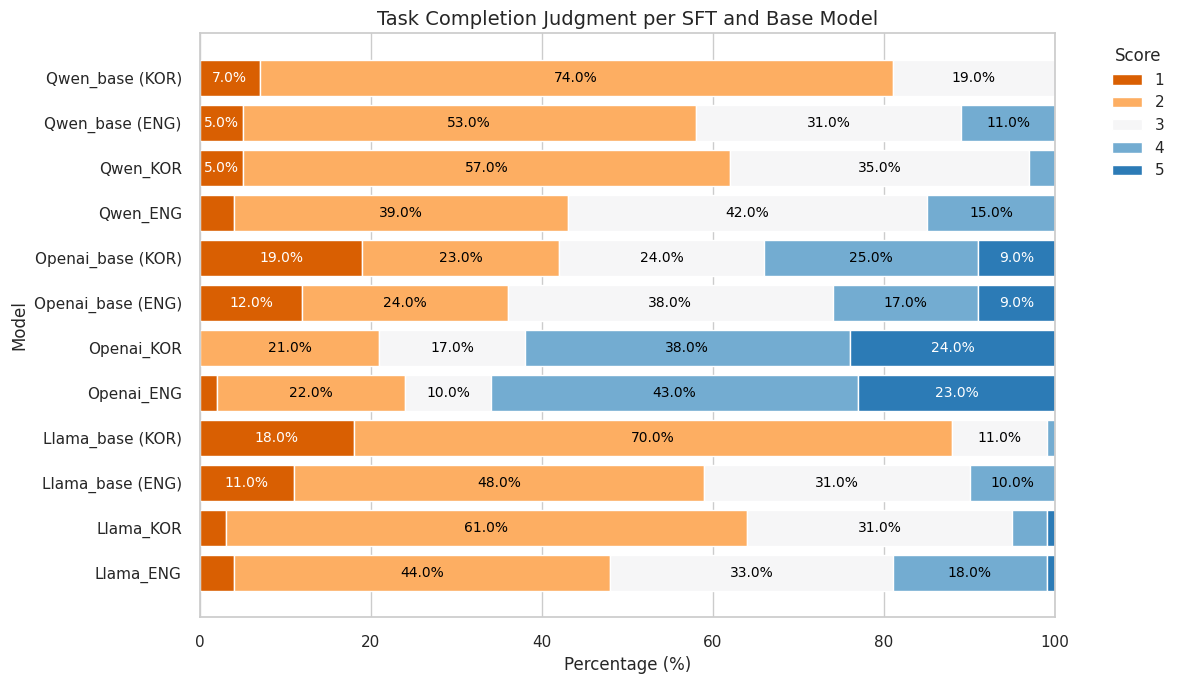

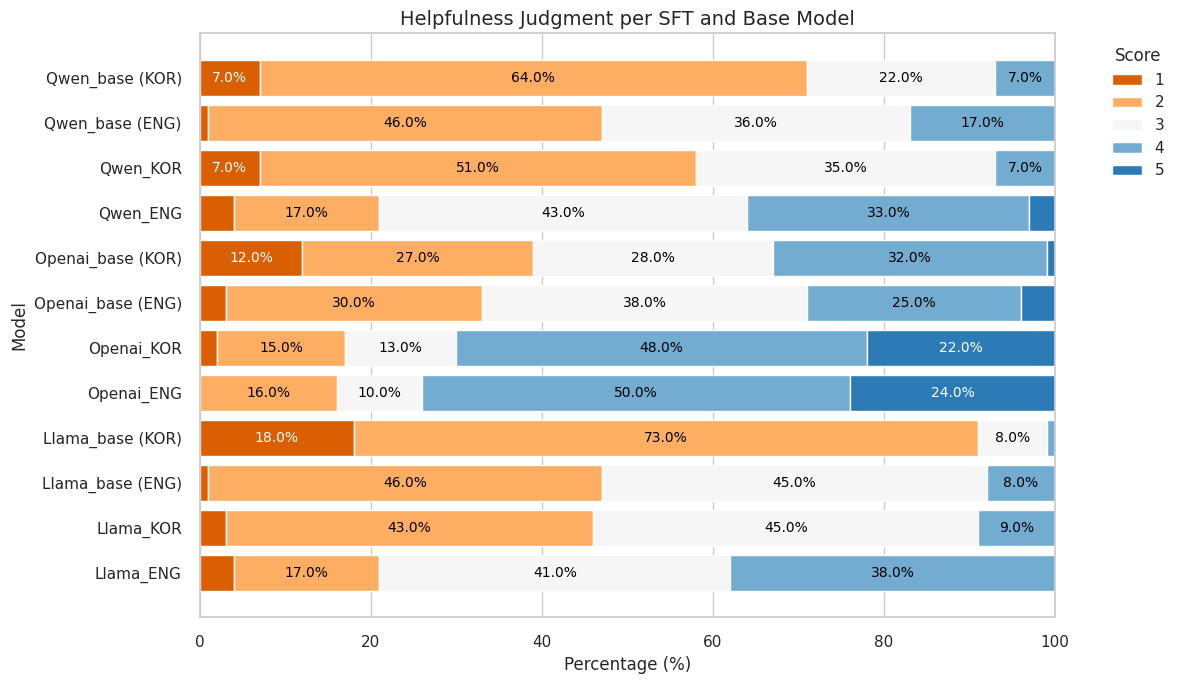

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

llm_metrics = [
    "llm_judge.argument_correctness",
    "llm_judge.task_completion",
    "llm_judge.helpfulness"
]

group_col = "out_name"
score_levels = [1, 2, 3, 4, 5]

# -------------------------------------------------
# Gradient colormap: 1 = dark orange → 5 = dark blue
# -------------------------------------------------
score_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "orange_to_blue_grad",
    ["#d95f02", "#fdae61", "#f7f7f7", "#74add1", "#2c7bb6"]
)

# normalize scores 1–5
score_norm = mpl.colors.Normalize(vmin=1, vmax=5)

for metric in llm_metrics:

    # ----------------------------
    # Prepare data
    # ----------------------------
    stacked_data = (
        df.groupby([group_col, metric])
          .size()
          .unstack(fill_value=0)
          .reindex(columns=score_levels, fill_value=0)
    )

    # Convert counts → percentages (row-wise)
    stacked_pct = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

    # ----------------------------
    # Plot (bigger figure)
    # ----------------------------
    fig, ax = plt.subplots(figsize=(12, 7))   # ⬅️ bigger!

    left = [0] * len(stacked_pct)

    for score in stacked_pct.columns:
        values = stacked_pct[score]

        # gradient color based on SCORE
        color = score_cmap(score_norm(score))

        bars = ax.barh(
            stacked_pct.index,
            values,
            left=left,
            color=color,
            edgecolor="white",
            label=score
        )

        # ---- % labels ----
        for bar, val in zip(bars, values):
            if val >= 5:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{val:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=10,   # ⬅️ slightly bigger text
                    color="white" if score in [1, 5] else "black"
                )

        left = [l + v for l, v in zip(left, values)]

    # ----------------------------
    # Formatting
    # ----------------------------
    title = metric.split(".")[1].replace("_", " ").title()
    ax.set_title(f"{title} Judgment per SFT and Base Model", fontsize=14)
    ax.set_xlabel("Percentage (%)", fontsize=12)
    ax.set_ylabel("Model", fontsize=12)
    ax.set_xlim(0, 100)

    ax.tick_params(axis="both", labelsize=11)

    ax.legend(title="Score", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()


# **Evaluation for ChatGPT**
Different code as it doesn't use huggingface for inference.

In [ ]:
!pip install openai evaluate sacrebleu

In [ ]:
from openai import OpenAI
import evaluate

In [ ]:
models = {
  "bl": "ft:gpt-4.1-nano-2025-04-14:personal:bl:CsuvF7jo",
  "en": "ft:gpt-4.1-nano-2025-04-14:personal:english:CtAHprZc",
  "base": "gpt-4.1-nano-2025-04-14"
}

In [ ]:
client = OpenAI()
def generate_response(model_id, message):
  response = client.responses.create(
    model=model_id,
    input=messages[0]['content'],
    max_output_tokens = 512,
    temperature=0.6,
    top_p=0.9,
  )
  return response.output_text

In [ ]:
results = []
i = 0
for entry in eval_dataset:

  messages = entry['messages']
  reference = entry['reference']['content']
  prediction = generate_response(models['bl'], messages)

  result_entry = {}
  result_entry['question_id'] = i
  result_entry['question_text'] = messages[0]['content']
  result_entry['answer'] = prediction
  result_entry['reference'] = reference
  result_entry['metrics'] = {}


  # results_judge = llm_as_judge(messages[0]['content'], prediction, reference)
  results_bleu = bleu.compute(predictions=[prediction], references=[reference])
  results_rouge = rouge.compute(predictions=[prediction], references=[reference])
  results_bertscore = bertscore.compute(predictions=[prediction], references=[reference], lang="en")

  result_entry['metrics']['bleu'] = results_bleu
  result_entry['metrics']['rouge'] = results_rouge
  result_entry['metrics']['bertscore'] = results_bertscore
  # result_entry['metrics']['LLM_Judge'] = results_judge
  results.append(result_entry)

  i+=1
  print(f"{i}/{len(eval_dataset)}")


In [ ]:
results_path = "./drive/MyDrive/hyperscale/results/gpt_bl_results.json"
with open(results_path, 'w', encoding='utf-8') as outfile:
    json.dump(results, outfile, indent=2, ensure_ascii=False)